# Tutorial of squidpy on DSP

In [2]:
!mkdir tutorial_data
!mkdir tutorial_data/nanostring_data
!wget -P tutorial_data/nanostring_data https://nanostring-public-share.s3.us-west-2.amazonaws.com/SMI-Compressed/Lung5_Rep2/Lung5_Rep2+SMI+Flat+data.tar.gz
!tar -xzf tutorial_data/nanostring_data/Lung5_Rep2+SMI+Flat+data.tar.gz -C tutorial_data/nanostring_data/


--2023-06-28 10:39:49--  https://nanostring-public-share.s3.us-west-2.amazonaws.com/SMI-Compressed/Lung5_Rep2/Lung5_Rep2+SMI+Flat+data.tar.gz
Resolving nanostring-public-share.s3.us-west-2.amazonaws.com (nanostring-public-share.s3.us-west-2.amazonaws.com)... 52.218.228.49, 52.92.251.34, 52.92.209.178, ...
Connecting to nanostring-public-share.s3.us-west-2.amazonaws.com (nanostring-public-share.s3.us-west-2.amazonaws.com)|52.218.228.49|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1631848310 (1.5G) [binary/octet-stream]
Saving to: ‘tutorial_data/nanostring_data/Lung5_Rep2+SMI+Flat+data.tar.gz’

Lung5_Rep2+SMI+Flat 100%[===================>]   1.52G  19.2MB/s    in 96s     

2023-06-28 10:41:26 (16.2 MB/s) - ‘tutorial_data/nanostring_data/Lung5_Rep2+SMI+Flat+data.tar.gz’ saved [1631848310/1631848310]



In [3]:
from pathlib import Path

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
import squidpy as sq

In [4]:
nanostring_dir = Path().resolve() / "tutorial_data" / "nanostring_data"
sample_dir = nanostring_dir / "Lung5_Rep2" / "Lung5_Rep2-Flat_files_and_images"

adata = sq.read.nanostring(
    path=sample_dir,
    counts_file="Lung5_Rep2_exprMat_file.csv",
    meta_file="Lung5_Rep2_metadata_file.csv",
    fov_file="Lung5_Rep2_fov_positions_file.csv",
)

In [5]:
#QC
adata.var["NegPrb"] = adata.var_names.str.startswith("NegPrb")
sc.pp.calculate_qc_metrics(adata, qc_vars=["NegPrb"], inplace=True)

In [6]:
import pandas as pd

pd.set_option("display.max_columns", None)


In [7]:
adata.obs["total_counts_NegPrb"].sum() / adata.obs["total_counts"].sum() * 100

0.3722155201830987

<Axes: title={'center': 'Transcripts per FOV'}, xlabel='total_counts', ylabel='Count'>

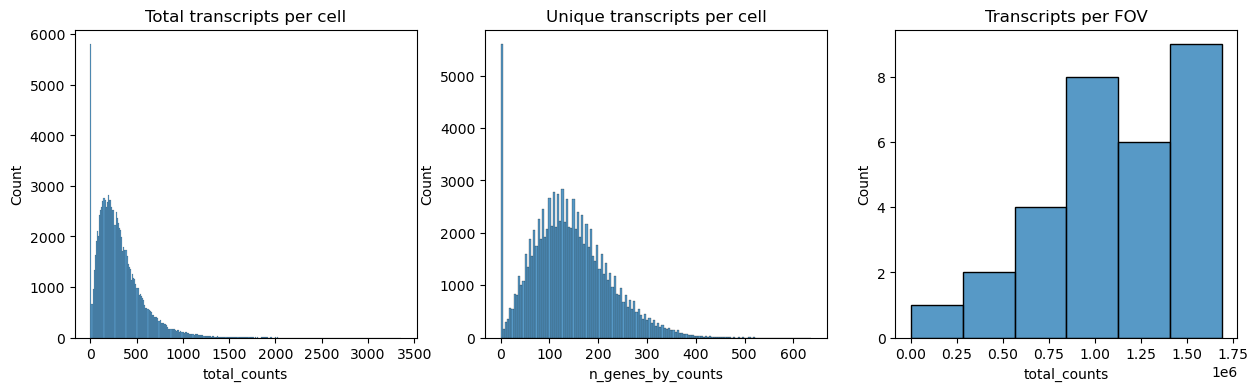

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

axs[0].set_title("Total transcripts per cell")
sns.histplot(
    adata.obs["total_counts"],
    kde=False,
    ax=axs[0],
)

axs[1].set_title("Unique transcripts per cell")
sns.histplot(
    adata.obs["n_genes_by_counts"],
    kde=False,
    ax=axs[1],
)

axs[2].set_title("Transcripts per FOV")
sns.histplot(
    adata.obs.groupby("fov").sum()["total_counts"],
    kde=False,
    ax=axs[2],
)

<Axes: title={'center': 'CD3'}, xlabel='Mean.CD3', ylabel='Count'>

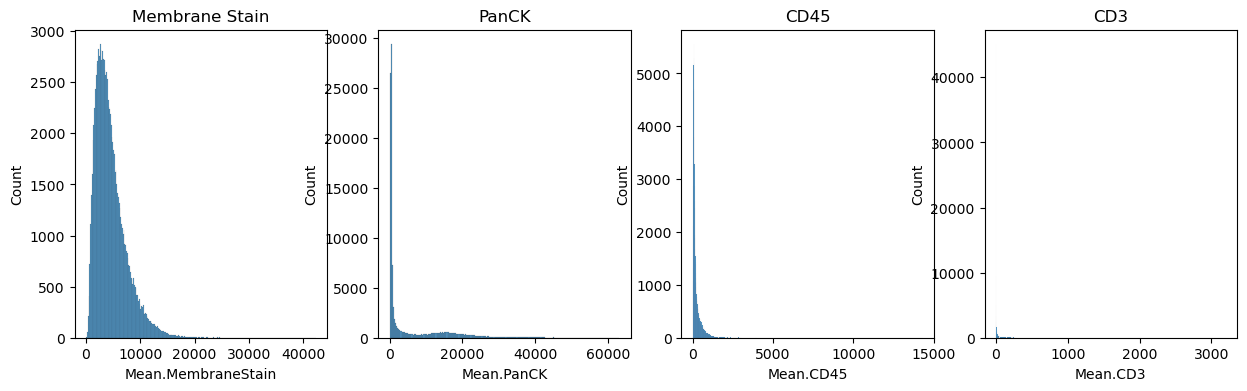

In [9]:
fig, axs = plt.subplots(1, 4, figsize=(15, 4))

axs[0].set_title("Membrane Stain")
sns.histplot(
    adata.obs["Mean.MembraneStain"],
    kde=False,
    ax=axs[0],
)

axs[1].set_title("PanCK")
sns.histplot(
    adata.obs["Mean.PanCK"],
    kde=False,
    ax=axs[1],
)

axs[2].set_title("CD45")
sns.histplot(
    adata.obs["Mean.CD45"],
    kde=False,
    ax=axs[2],
)

axs[3].set_title("CD3")
sns.histplot(
    adata.obs["Mean.CD3"],
    kde=False,
    ax=axs[3],
)

In [11]:
sc.pp.filter_cells(adata, min_counts=100)
sc.pp.filter_genes(adata, min_cells=400)

In [12]:
adata.layers["counts"] = adata.X.copy()
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata)

/home/xinghua/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


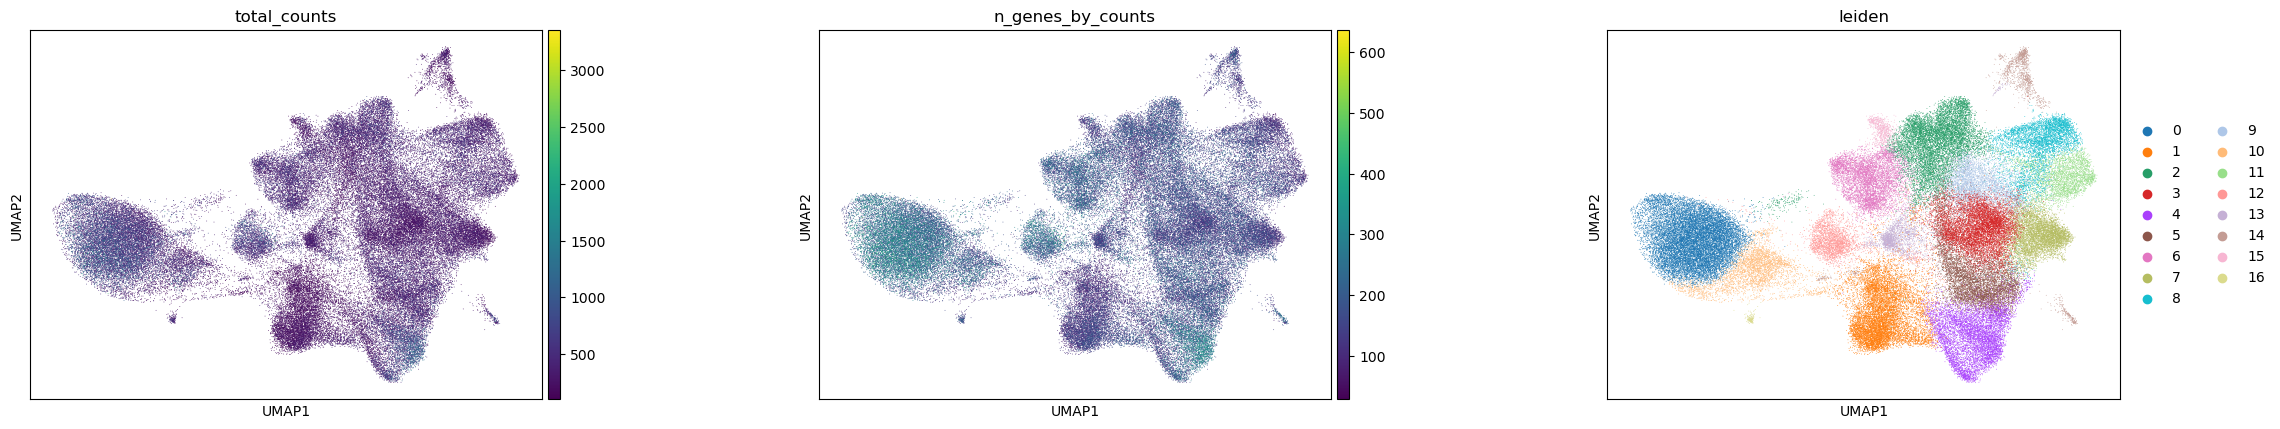

In [13]:
sc.pl.umap(
    adata,
    color=[
        "total_counts",
        "n_genes_by_counts",
        "leiden",
    ],
    wspace=0.4,
)

TypeError: 'collection' must be an instance of matplotlib.collections.Collection, not a matplotlib.image.AxesImage

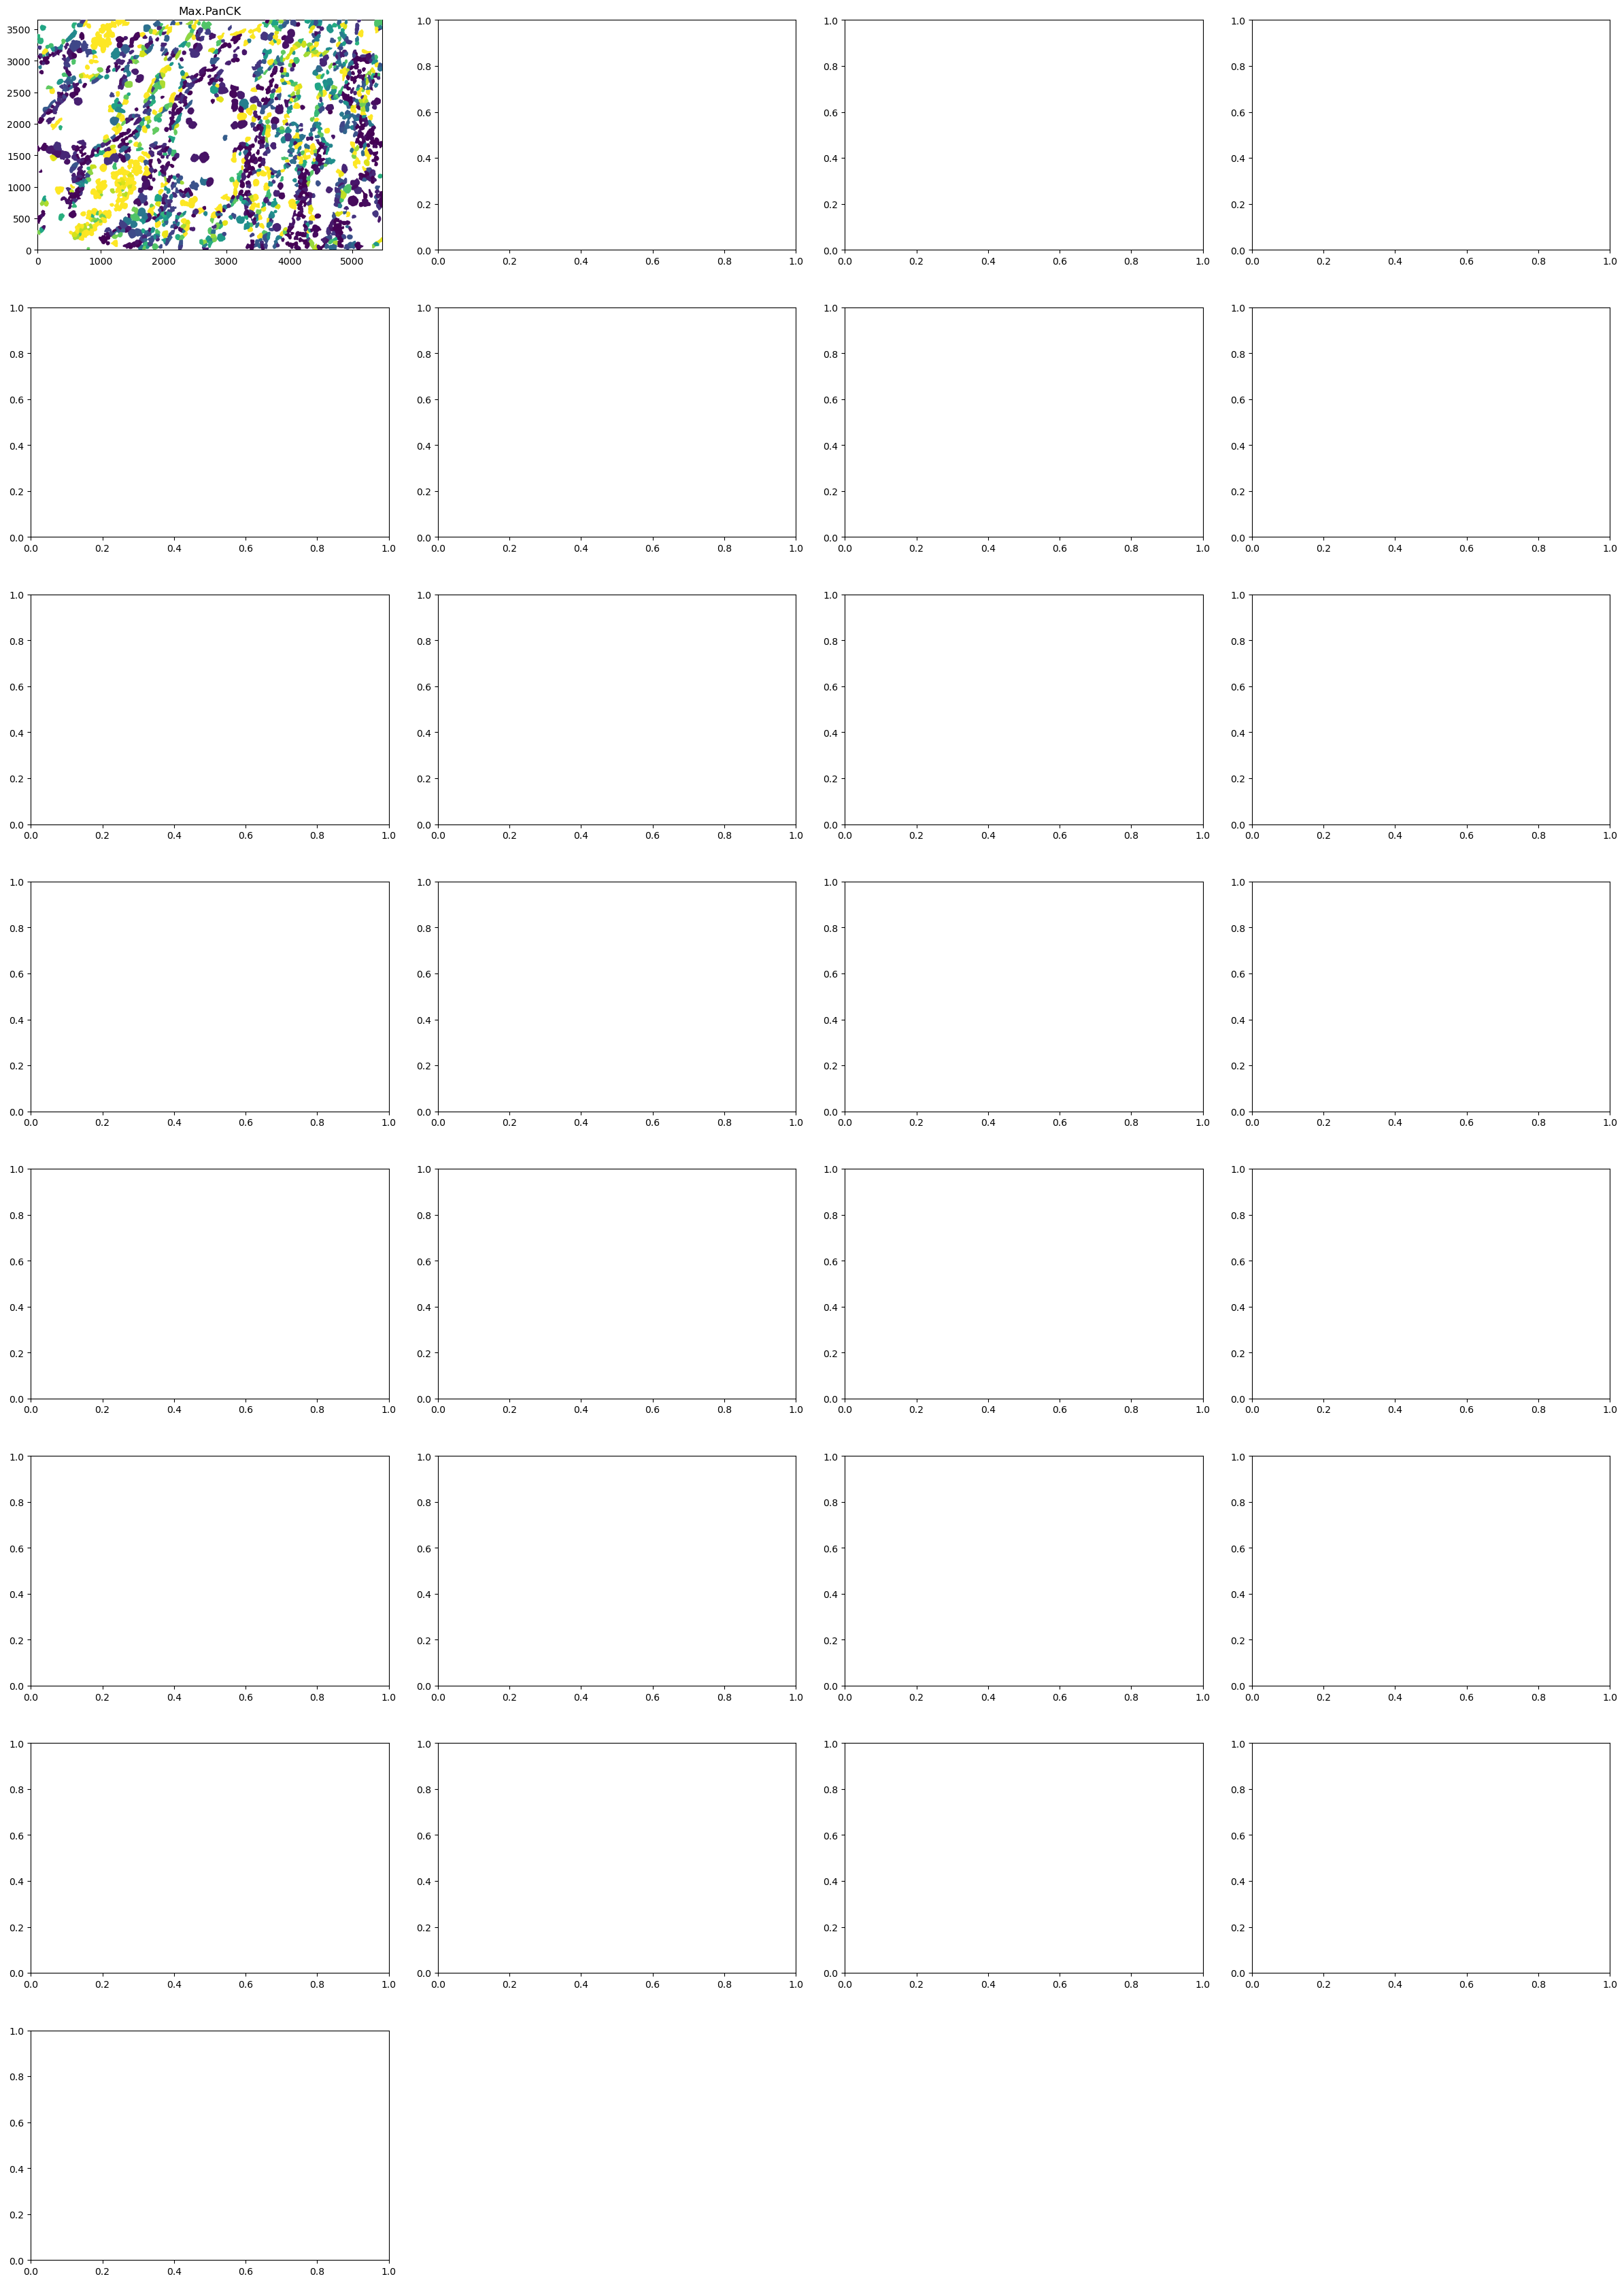

In [17]:
sq.pl.spatial_segment(
    adata,
    color="Max.PanCK",
    library_key="fov",
    seg_cell_id="cell_ID",
)

TypeError: 'collection' must be an instance of matplotlib.collections.Collection, not a matplotlib.image.AxesImage

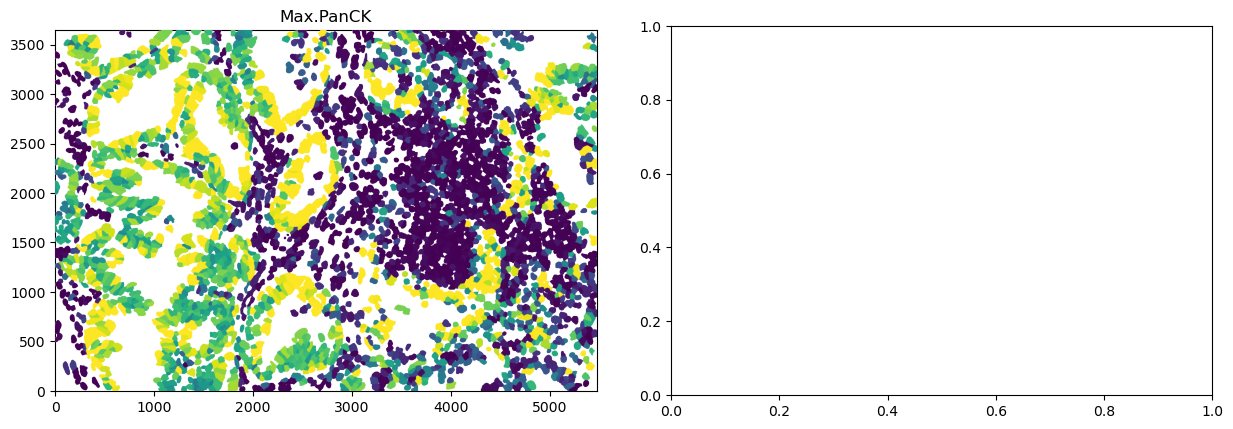

In [16]:
sq.pl.spatial_segment(
    adata,
    color="Max.PanCK",
    library_key="fov",
    library_id=["12", "16"],
    seg_cell_id="cell_ID",
)